In [2]:
import pandas as pd
import seaborn as sns
import matplotlib
# make the text in seaborn figures larger 
sns.set(font_scale = 2)
# make figures display automatically
%matplotlib inline
# set the default figure size in this notebook
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

In [3]:
tips = pd.read_csv('seaborn-data/tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


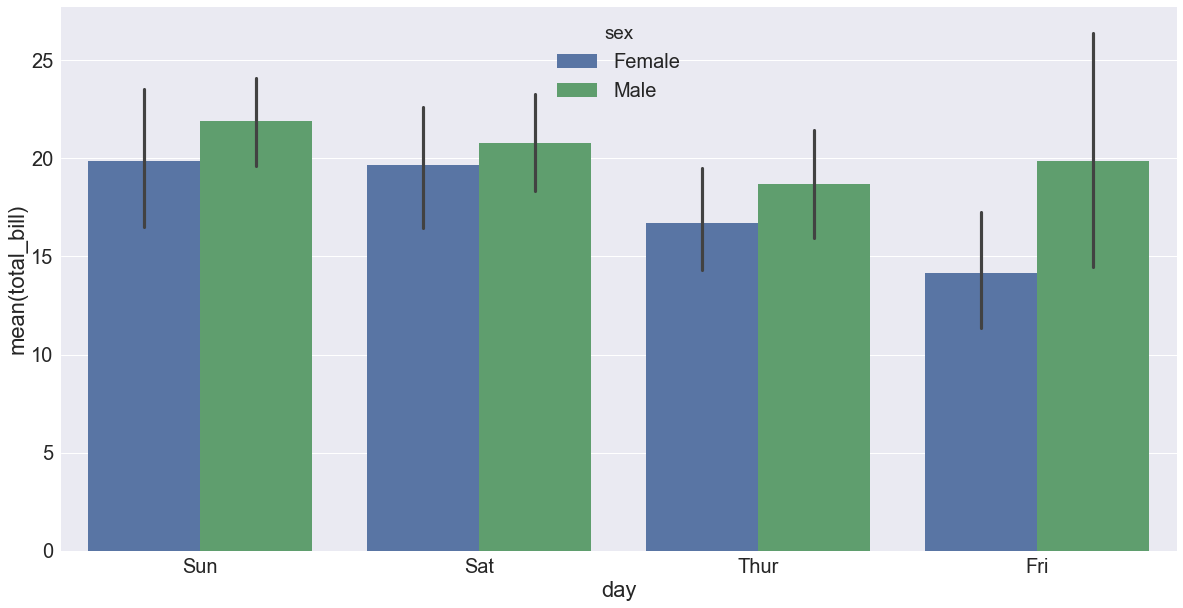

In [4]:
ax = sns.barplot(x="day", y="total_bill", hue='sex', data=tips)

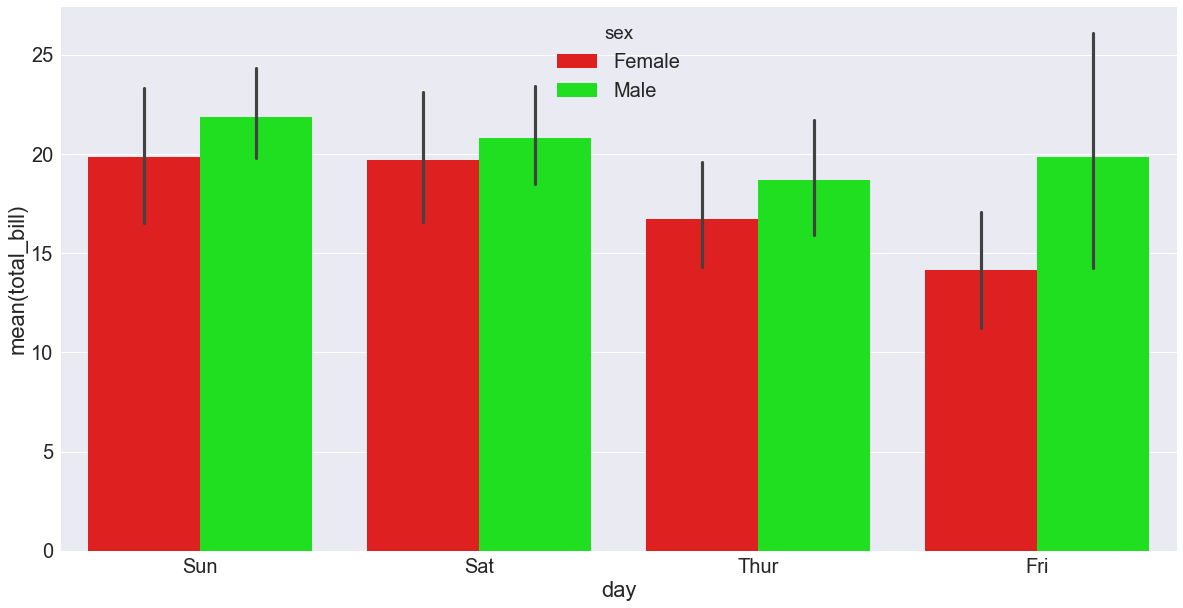

In [5]:
# use a custom palette
palette = ['#FF0000','#00FF00']
ax = sns.barplot(x="day", y="total_bill", hue='sex', data=tips, palette=palette)

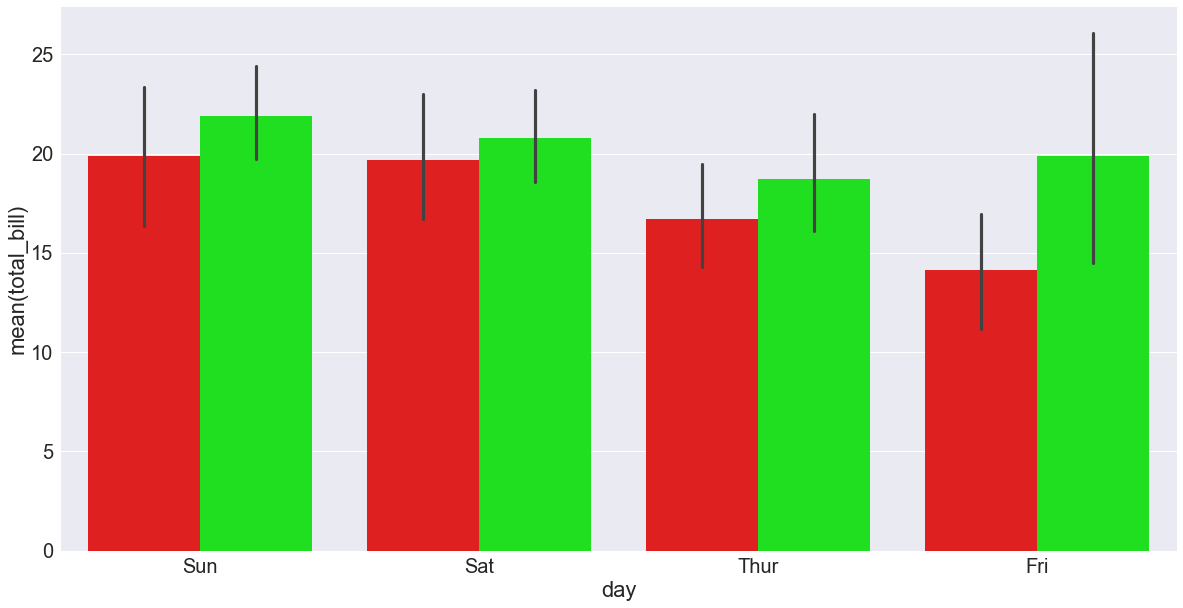

In [6]:
ax = sns.barplot(x="day", y="total_bill", hue='sex', data=tips, palette=palette)
# remove the legend
ax.legend_.remove()

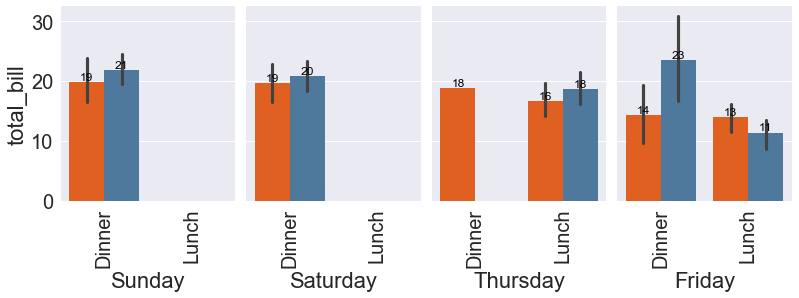

In [8]:
# Plot several graphs side by side.
# Say there are 4 dimensions: day, sex, total_bill, and time.
# total_bill -> utilization
# day  -> site
# time -> path
# sex  -> ingress_egress (create a dataframe with this field composed of the individual dataframes ingress and egress)
cgnxpalette = [ "#FF5500", "#417AA9", "#545759", "A43D3A","#9BBB59","#8064A2","#4BACC6","#889AB6"]

g = sns.factorplot(x="time", y="total_bill",
                    hue="sex", col="day",
                    data=tips, kind="bar",
                    size=4, aspect=.7,
                    palette=cgnxpalette,
                    legend=False
                  );


# 'time' needs to be replaced by the day
g.fig.get_axes()[0].set_xlabel("Sunday")
g.fig.get_axes()[1].set_xlabel("Saturday")
g.fig.get_axes()[2].set_xlabel("Thursday")
g.fig.get_axes()[3].set_xlabel("Friday")

# remove 'day = Sun' etc
g.fig.get_axes()[0].set_title("")
g.fig.get_axes()[1].set_title("")
g.fig.get_axes()[2].set_title("")
g.fig.get_axes()[3].set_title("")

# Rotate labels by 90º
g.set_xticklabels(rotation=90)

# Add numbers to the top
import math
# Rounding the integer to the next hundredth value plus an offset of 100
def roundup(x):
    return 100 + int(math.ceil(x / 100.0)) * 100 

# Iterate through the list of axes' patches
for _ax in g.fig.get_axes():
    for p in _ax.patches:
        if not math.isnan(p.get_height()):
            _ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
                fontsize=12, color='black', ha='center', va='bottom')